# Data preparation, processing and visualization

At this point, let's remind our core aim: to analyse some interesting relationships (esp. rent prices and distance from metro) based on data scraped from sReality.cz. 

Now, having the scraped massive dataset, our goal is to analyse and visualize underlaying relationships of chosen variables. We attempt to do so by (a) matplotlib and (b) geopandas tools. Nevertheless, before we can do so, the data need to be inspected and adjusted.

## I. Getting familiar with the data

First, we prepare the environment for analysis and get familiar with the structure and variables of data.

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("dataset.csv", sep = ';') #uploading our scraped data
data.head(4)

,Unnamed: 0,Adresa,Aktualizace:,Balkón:,Bankomat:,Bazén:,Bezbariérový:,Bus MHD:,Celková cena:,Cena:,...,Večerka:,Vlak:,Vlastnictví:,Voda:,Vybavení:,Výtah:,Výška stropu:,Zlevněno:,Škola:,Školka:
0,0,"Dobrovolného, Praha 9 - Černý Most Panorama",['Dnes'],NaN,"['Bankomat České spořitelny', ' (542 m)']",NaN,NaN,"['Generála Janouška', ' (132 m)']",['12 000 Kč za měsíc'],NaN,...,"['Albert Supermarket', ' (451 m)']","['Praha-Kyje', ' (1445 m)']",['Osobní'],NaN,NaN,NaN,NaN,NaN,"['ZUŠ Praha 9, Ratibořická', ' (234 m)']","['MŠ Sluníčko Praha 9 - Černý Most', ' (279 m)']"
1,0,"Bořivojova, Praha 3 - Žižkov Panorama",['Dnes'],NaN,"['Bankomat České spořitelny', ' (122 m)']",NaN,"[""'boolean-false'""]","['Tachovské náměstí', ' (443 m)']","['9 500 Kč za nemovitost, + provize RK']",NaN,...,"['Shalamar Foods', ' (165 m)']","['Praha hlavní nádraží', ' (984 m)']",['Osobní'],NaN,NaN,NaN,NaN,NaN,"['Gymnázium Karla Sladkovského Praha 3', ' (56...","['ZŠ a MŠ Jaroslava Seiferta Praha 3', ' (243 ..."
2,0,"Tupolevova, Praha 9 - Letňany Panorama",['Dnes'],NaN,"['Bankomat České spořitelny', ' (236 m)']",NaN,"[""'boolean-true'""]","['Šumperská', ' (177 m)']",['13 900 Kč za měsíc'],NaN,...,"['Penny Market', ' (183 m)']","['Praha-Čakovice', ' (1695 m)']",['Osobní'],NaN,NaN,"[""'boolean-true'""]",NaN,NaN,"['Základní škola Fryčovická', ' (160 m)']","['MŠ Havířovská', ' (255 m)']"
3,0,"Podbělohorská, Praha 5 - Smíchov Panorama",['Dnes'],NaN,"['Bankomat Komerční banky', ' (381 m)']",NaN,"[""'boolean-false'""]","['Pod Lipkami', ' (30 m)']","['15 000 Kč za nemovitost, + provize RK']",NaN,...,"['Smíšené zboží Plzeňská\t187', ' (404 m)']","['Praha-Cibulka', ' (1229 m)']",['Osobní'],['Dálkový vodovod'],NaN,NaN,NaN,NaN,"['ZUŠ Na Popelce', ' (224 m)']","['TROIS PETITES POMMES, s.r.o.', ' (343 m)']"


In [2]:
data = data.drop(["Unnamed: 0"], axis= 1)  #this drops the unnamed column as it has no value
data.info() #inspecting all the variables, their type and number of observations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7878 entries, 0 to 7877
Data columns (total 79 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Adresa                                   7878 non-null   object
 1   Aktualizace:                             7878 non-null   object
 2   Balkón:                                  1960 non-null   object
 3   Bankomat:                                7455 non-null   object
 4   Bazén:                                   21 non-null     object
 5   Bezbariérový:                            1744 non-null   object
 6   Bus MHD:                                 7756 non-null   object
 7   Celková cena:                            7646 non-null   object
 8   Cena:                                    47 non-null     object
 9   Cukrárna:                                7455 non-null   object
 10  Datum nastěhování:                       1751 non-null   obj

In [3]:
#We rename columns so that we can better work with them 
#Specifically, adding underscored characters in multi-word names, deleting colons, 
#rewriting some long names in shorter form (among those that are very likely to be used in the analysis)

data.columns = ['Adresa', 'Aktualizace', 'Balkón', 'Bankomat', 'Bazén',
       'Bezbariérový', 'Bus_MHD', 'Price_total', 'Price', 'Cukrárna',
       'Datum_nastěhování', 'Datum_prohlídky_do', 'Datum_prohlídky',
       'Datum_zahájení_prodeje', 'Divadlo', 'Doprava', 'Elektřina',
       'Energy_demands', 'Garáž', 'Hospoda', 'Hřiště',
       'ID_zakázky:', 'ID', 'Kino', 'Komunikace', 'Kulturní_památka',
       'Lodžie', 'Lékař', 'Lékárna', 'Metro', 'Náklady_na_bydlení',
       'Obchod', 'Odpad', 'Parkování', 'Plocha_podlahová',
       'Plocha_pozemku', 'Plocha_zahrady', 'Plocha_zastavěná', 'Plyn',
       'Podlaží', 'Poloha domu', 'Poznámka_k_ceně', 'Počet bytů', 'Pošta',
       'Provize', 'Energy_demands_II', 'Převod_do_OV',
       'Přírodní zajímavost', 'Půdní_vestavba', 'Původní_cena',
       'Restaurace', 'Rok_kolaudace', 'Rok_rekonstrukce', 'Sklep',
       'Sportoviště', 'Stav_objektu', 'Stav', 'Stavba', 'Telekomunikace',
       'Terasa', 'Title', 'Topení', 'Tram', 'Typ_bytu', 'Typ_domu',
       'Energy_demands_III', 'Umístění_objektu',
       'Area', 'Veterinář', 'Večerka', 'Vlak', 'Vlastnictví',
       'Voda', 'Vybavení', 'Výtah', 'Výška_stropu', 'Zlevněno', 'Škola',
       'Školka']

In total, we have 7878 observations and 79 columns. Neverheless, as we can see above, many of the columns contain only a relatively limited information (in terms of number of their observations), specifically 49 variables have more than 10% of missing values. Hence, the strenght of their evidence is limited and we need to be aware of this limitation. Variables with extreme portion of missing values (> 90%) deserve special attention and we should rather not include them in the analysis at all because they don't tell us much.

In [4]:
n_observations = 7878
empty = data.isnull().sum()
empty[empty > n_observations*0.9].sort_values(ascending = False).count()
#number of variables that miss more than 90% of observations

25

In [5]:
empty[empty > n_observations*0.9].sort_values(ascending = False) #list of those variables

Typ_domu                  7877
Plocha_pozemku            7877
Poloha domu               7877
Datum_prohlídky_do        7873
Datum_zahájení_prodeje    7870
Počet bytů                7870
Bazén                     7857
Převod_do_OV              7854
Půdní_vestavba            7838
Datum_prohlídky           7832
Price                     7831
Stav                      7818
Plocha_zahrady            7808
Výška_stropu              7801
Energy_demands_II         7719
Provize                   7705
Původní_cena              7693
Zlevněno                  7693
Plocha_zastavěná          7663
Rok_kolaudace             7643
Energy_demands_III        7579
Typ_bytu                  7547
Rok_rekonstrukce          7319
Lodžie                    7309
Náklady_na_bydlení        7224
dtype: int64

The most suitable variables are these 31 that miss less than 90% of observations. Regarding the aim of our project, it is pleasant that variable 'Metro' can be found here. In our analysis, we will consider 6 more variables, i.e. all variables that contain more than 66% of observations.

In [6]:
empty[empty < n_observations*0.1].sort_values(ascending = False)

Kulturní_památka    757
Kino                463
Divadlo             459
Obchod              456
Restaurace          423
Bankomat            423
Cukrárna            423
Hospoda             423
Lékař               423
Lékárna             423
Škola               423
Pošta               423
Školka              423
Veterinář           423
Večerka             423
Metro               254
Price_total         232
Tram                205
Vlak                128
Bus_MHD             122
Sportoviště         117
Hřiště              117
Vlastnictví           1
Podlaží               0
Area                  0
Title                 0
Stavba                0
Stav_objektu          0
Aktualizace           0
Adresa                0
dtype: int64

In [7]:
empty[np.all([(empty > n_observations*0.1),(empty < n_observations*0.33)], axis = 0)].sort_values(ascending = False)

Plocha_podlahová    2575
Výtah               2249
Poznámka_k_ceně     2114
Vybavení            1901
Energy_demands      1896
ID_zakázky:          953
dtype: int64

## II. Dataset adjustments
At this point, two things need to be done. Adjusting the dataset only for variables that have some evidence power, and adjusting the column 'Price' as its string values are currently very messy which makes it impossible to work with this crucial variable in our analysis.

### a) Keeping worthy variables only
As discussed above, we consider only variables with more than 66% of observations. Let's adjust the dataset accordingly...

In [8]:
variable = empty[empty < n_observations*0.33]
variable.index

Index(['Adresa', 'Aktualizace', 'Bankomat', 'Bus_MHD', 'Price_total',
       'Cukrárna', 'Divadlo', 'Energy_demands', 'Hospoda', 'Hřiště',
       'ID_zakázky:', 'Kino', 'Kulturní_památka', 'Lékař', 'Lékárna', 'Metro',
       'Obchod', 'Plocha_podlahová', 'Podlaží', 'Poznámka_k_ceně', 'Pošta',
       'Restaurace', 'Sportoviště', 'Stav_objektu', 'Stavba', 'Title', 'Tram',
       'Area', 'Veterinář', 'Večerka', 'Vlak', 'Vlastnictví', 'Vybavení',
       'Výtah', 'Škola', 'Školka'],
      dtype='object')

In [9]:
data[variable.index].head()

,Adresa,Aktualizace,Bankomat,Bus_MHD,Price_total,Cukrárna,Divadlo,Energy_demands,Hospoda,Hřiště,...,Tram,Area,Veterinář,Večerka,Vlak,Vlastnictví,Vybavení,Výtah,Škola,Školka
0,"Dobrovolného, Praha 9 - Černý Most Panorama",['Dnes'],"['Bankomat České spořitelny', ' (542 m)']","['Generála Janouška', ' (132 m)']",['12 000 Kč za měsíc'],"['Shisha Room Dvin', ' (1144 m)']","['Přírodní divadlo Dády Stoklasy', ' (3152 m)']",['Třída G - Mimořádně nehospodárná'],"['Šenk Na Rajské', ' (476 m)']","['Dětské hřiště Rajský vrch', ' (162 m)']",...,"['Lehovec', ' (1136 m)']",['26m2'],"['MetropoleVet Praha s.r.o.', ' (623 m)']","['Albert Supermarket', ' (451 m)']","['Praha-Kyje', ' (1445 m)']",['Osobní'],NaN,NaN,"['ZUŠ Praha 9, Ratibořická', ' (234 m)']","['MŠ Sluníčko Praha 9 - Černý Most', ' (279 m)']"
1,"Bořivojova, Praha 3 - Žižkov Panorama",['Dnes'],"['Bankomat České spořitelny', ' (122 m)']","['Tachovské náměstí', ' (443 m)']","['9 500 Kč za nemovitost, + provize RK']","['Klub JINÝ KAFE', ' (283 m)']","['Žižkovské divadlo Járy Cimrmana', ' (280 m)']",['Třída G - Mimořádně nehospodárná'],"['Hospůdka U Habásků', ' (209 m)']","['Dětské hřiště Bořivojova', ' (294 m)']",...,"['Lipanská', ' (186 m)']",['23m2'],"['MVDr. Jan Dubský', ' (425 m)']","['Shalamar Foods', ' (165 m)']","['Praha hlavní nádraží', ' (984 m)']",['Osobní'],NaN,NaN,"['Gymnázium Karla Sladkovského Praha 3', ' (56...","['ZŠ a MŠ Jaroslava Seiferta Praha 3', ' (243 ..."
2,"Tupolevova, Praha 9 - Letňany Panorama",['Dnes'],"['Bankomat České spořitelny', ' (236 m)']","['Šumperská', ' (177 m)']",['13 900 Kč za měsíc'],"['Café Infinity', ' (204 m)']","['Divadlo Pohádka', ' (1057 m)']",NaN,"['Pivnice na Královce', ' (1824 m)']","['Venkovní posilovna u obchodního centra', ' (...",...,"['Sídliště Ďáblice', ' (1906 m)']",['52m2'],"['Veterinární ordinace Letňany', ' (302 m)']","['Penny Market', ' (183 m)']","['Praha-Čakovice', ' (1695 m)']",['Osobní'],NaN,"[""'boolean-true'""]","['Základní škola Fryčovická', ' (160 m)']","['MŠ Havířovská', ' (255 m)']"
3,"Podbělohorská, Praha 5 - Smíchov Panorama",['Dnes'],"['Bankomat Komerční banky', ' (381 m)']","['Pod Lipkami', ' (30 m)']","['15 000 Kč za nemovitost, + provize RK']","['Cukrárna Pod Marjánkou', ' (1333 m)']","['JUDr. Jiří Šilhán', ' (279 m)']",['Třída B - Velmi úsporná'],"['Restaurace Na zámyšli', ' (423 m)']","['Dětské hřiště Na Vršku', ' (116 m)']",...,"['Kavalírka', ' (370 m)']",['58m2'],"['Veterinární klinika - MVDr. Pavel Santar, MV...","['Smíšené zboží Plzeňská\t187', ' (404 m)']","['Praha-Cibulka', ' (1229 m)']",['Osobní'],NaN,NaN,"['ZUŠ Na Popelce', ' (224 m)']","['TROIS PETITES POMMES, s.r.o.', ' (343 m)']"
4,"Mezi domy, Praha 4 - Písnice Panorama",['Dnes'],"['Bankomat Komerční banky', ' (780 m)']","['U Libušské sokolovny', ' (275 m)']",['19 500 Kč za měsíc'],"['Cukrářství Viktoria, s.r.o.', ' (900 m)']","['Tradiční loutkové divadlo Zvoneček', ' (3145...",['Třída D - Méně úsporná č. 78/2013 Sb. podle ...,"['Hospůdka U Báti', ' (509 m)']","['Dětské hřiště Pyramida Na Okruhu', ' (78 m)']",...,"['Levského', ' (1815 m)']",['93m2'],"['Vetnemo, s.r.o.', ' (634 m)']","['VIVACOMEX, spol. s r.o.', ' (450 m)']","['Praha-Krč', ' (3635 m)']",['Osobní'],NaN,"[""'boolean-true'""]",['Střední odborné učiliště potravinářské Praha...,"['Mateřská škola Mezi Domy', ' (105 m)']"


In [10]:
data[variable.index].head().to_csv('dataview.csv', sep = ';')

### b) Dealing with messy prices (alternative 1)

Before we can do the analysis, we need to deal with the complicated form of stated prices and obtain purely the monthly rent in CZK, without other specification (in other words, we need to extract integer out of the string values).

In order to be able to suitably merge the resulting list of prices to the original dataset, it is neccessary to get rid of rows with empty prices values beforehand. Furthermore, during the analysis, we explored two error values in the dataset (tiny but with serious consequences): observation data.Price_total[984] has value of "12 CZK" which is nonsense and observation data.Price_total[6727] has value "23 214 CZK (850 EUR)" which cases troubles in the analysis and we need to get rid of both of these errors beforehand.

In [11]:
# data.dropna(subset = ['Price_total'], inplace=True)
# new_data = data.drop([984,6727]).reset_index(drop=True)

##by inspecting "new_data.info()" we can confirm that the maximum number of observations for any variable is 7645, 
##which is exactly the number of non-empty observations of 'Price_total' 

##Taking the available 'Price_total' data
#Price_orig = new_data.Price_total
#a= np.array(Price_orig)
#print(a)

In [12]:
##Converting them into a list of strings and subsequently a string
#a_str_prep = [str(i) for i in a]
#a_string = ",".join(a_str_prep)
#print(a_string)

In [13]:
##Extracting all numerical characters out of the a_string
#temp = re.findall(r'\d+', a_string) 
#res = list(map(int, temp))
#print(res)

After exploration of the res' output we can see that the goal now is to merge every two elements together in order to obtain the stated price. There is also an obvious issue that Python takes values '000' as '=0', and we get to this soon.

In [14]:
#res_str = [str(i) for i in res]

#Q = []
#for k in range(0,7645):
#    joined = res_str[0+2*k]+res_str[1+2*k]
#    Q.append(joined)
#    print(joined)

After inspecting the output of the Q list, we can conclude that it seems to work well, except the issue with nulls. We solve this by using the for loop method in combination with "if statement". The logic is to take every observation that apparently "misses two nulls" (i.e. its value is <1000) and "add these nulls" by multiplying the value by 100. Afterwards, everything seems to be just fine...

In [15]:
#Q = [float(i) for i in Q]

In [16]:
#prices = []

#for price in Q:
#    if price <1000:
#       x = price*100
#       prices.append(x)
        
#    else:
#        y = price
#        prices.append(y)
    
#print(prices)

### b) Dealing with messy prices (alternative 2 - extractor)

In [17]:
import re

In [18]:
def extractor(inp):
    try:
        result = int(re.sub("[^0-9]", "",inp))
    except:
        result = None
    return result

In [19]:
data['cena'] = data['Price_total'].apply(extractor)

In [20]:
print(data.cena)

0       12000.0
1        9500.0
2       13900.0
3       15000.0
4       19500.0
         ...   
7873    35000.0
7874    33000.0
7875    55000.0
7876    75000.0
7877    35000.0
Name: cena, Length: 7878, dtype: float64


We spot faulty values in top 51 result with the EUR information included.

In [21]:
data['cena'].sort_values(ascending = False)[1:51]

5533    1.269925e+09
3993    1.269925e+09
7549    1.031504e+09
2476    1.031234e+09
7526    1.022494e+09
7491    1.011024e+09
3774    9.913636e+08
7545    9.771636e+08
7054    9.770736e+08
2471    9.768836e+08
5466    9.585935e+08
7681    9.558535e+08
7544    9.553135e+08
4024    9.553135e+08
7499    9.359234e+08
7203    8.247730e+08
7047    8.193030e+08
7516    7.813429e+08
7051    7.641428e+08
7592    7.595028e+08
3779    7.592228e+08
7071    7.439327e+08
5524    7.051526e+08
3828    7.051526e+08
3419    7.048826e+08
7070    6.909525e+08
3775    6.505324e+08
7108    6.505324e+08
7543    6.505324e+08
7073    6.374223e+08
3424    6.374223e+08
7546    6.289523e+08
7072    6.289023e+08
4336    6.286823e+08
7504    6.073822e+08
3831    5.961822e+08
7283    5.527620e+08
7300    5.202619e+08
7077    5.202619e+08
7505    5.027818e+08
3262    4.768417e+08
7689    4.096515e+08
2690    4.096515e+08
6456    3.786414e+08
7101    3.785214e+08
7059    3.708714e+08
7370    3.678713e+08
7069    2.965

In [22]:
fal_indx = data['cena'].sort_values(ascending = False)[1:51].index #we gather indexes
spec = 6727 # it is a special index because has 3 digit number in EUR, all other 4 

In [23]:
#let us write a function to handle these exceptions
def remove_4(index):
    #global fal_indx
    #global spec
    
    def rem_4(inp, n = -6):
        strin = str(data['cena'][inp])
        return(int(strin[:n]))
    
    if index in fal_indx:
        if index == spec:
            data['cena'][index] = rem_4(index, -5)
        else:
            data['cena'][index] = rem_4(index)

In [24]:
data.index.map(remove_4) #Despite the error, it does what we wanted 

/Users/marketamala/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/marketamala/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Index([None, None, None, None, None, None, None, None, None, None,
       ...
       None, None, None, None, None, None, None, None, None, None],
      dtype='object', length=7878)

Test:

In [25]:
data['cena'][3993]

126992.0

In [26]:
data['Price_total'][3993]

"['126 992 Kč (4 650 EUR) za měsíc, bez poplatků']"

Number of NaNs:

In [86]:
XYZ = np.array(data.cena)
NaNs = np.argwhere(np.isnan(XYZ))
len(NaNs)

232

### b) Dealing with messy prices (alternative 3 - split method)

In [47]:
prices_strings = [str(x) for x in data.Price_total]

In [48]:
prices_alt = []

for x in prices_strings:
    prices_alt.append(x.split("Kč")[0].replace(" ","").replace("'","").replace("[",""))

print(prices_alt)

['12000', '9500', '13900', '15000', '19500', '17000', '12500', '8500', '13000', '34900', '13000', '15200', '29000', '13490', '14500', '14500', '19500', '13000', '18000', '17000', '17500', '15500', '7500', '12500', '27000', '20000', '15000', 'nan', 'nan', '15500', '20000', '14800', '110000', '39000', '19000', '14700', '18000', '16000', '18900', '11990', '25000', '13500', '14500', '21000', '17000', '35000', '30000', '60497', '43000', '35000', '99500', '49500', '49000', '33000', '24000', '13000', '12000', '15288', '9500', '10600', '14500', '9000', '18800', '11500', '15000', '9950', '16000', '14450', '8450', '8000', '12000', '16500', '14500', 'nan', '12250', '13900', '17500', 'nan', '9450', '9500', '12000', '9400', '9000', '11500', '25000', '14000', '15500', '15000', '14800', '12200', '19000', '14000', '7500', '14500', '14000', '16000', '25500', '13500', '15000', '13250', '14000', '14000', '12500', '15500', '21000', '17500', '22000', '17000', '13500', '20000', '10500', '14000', '13000', '8

In [61]:
prices_alt_float = [float(i) for i in prices_alt]
len(prices_alt_float)

7878

Test:

In [90]:
prices_alt_float[3993]

126992.0

In [91]:
data['Price_total'][3993]

"['126 992 Kč (4 650 EUR) za měsíc, bez poplatků']"

Number of NaNs:

In [92]:
YZX = np.array(prices_alt_float)
NaNs_alt = np.argwhere(np.isnan(YZX))
len(NaNs_alt)

232

### c) Dealing with messy adresses

In this case, regex method extracting numerical characters (=districts of Prague) from observations appears to be the best way. Using the split fce doesn't seem to work well in this case.

In [147]:
#my first attempts for the split method. does not work that nice, but i keep it here for case...
#adress_strings = [str(i) for i in data.Adresa]

In [148]:
#district = []

#for y in adress_strings:
#    district.append(y.split("-")[0][-8:].replace(" ","").replace("[",""))

#print(district)

In [150]:
district = data['Adresa'].apply(extractor)
print(district)

0        9.0
1        3.0
2        9.0
3        5.0
4        4.0
        ... 
7873     NaN
7874    10.0
7875    10.0
7876     7.0
7877     7.0
Name: Adresa, Length: 7878, dtype: float64


In [154]:
data['district'] = district

In [164]:
data['district'].sort_values(ascending = False)[1:31] 
#we can see that these values apparently doesn't give as what we want. 
#it is because of occurence of "28. října" in couple of adresses of Prague 1 and "28. pluku" in Prague 10,
#"5. máje" in Prague 5, "5.května" in Prague 4, "obětí 6.května" in Prague 4 and "8.listopadu" in Prague 6.
#For these adresses we need to get rid of the first 1 or 2 characters to obtain the districts' numbers.
#Furthermore also 'Praha 10 - Praha 15 Panorama' [index 5017] and 'Praha 4 - Praha 11 Panorama' [index 2750]
#bring some complications. For these two, we need to get rid of last 2 characters.

1098    2810.0
2489    2810.0
6459    2810.0
83      2810.0
1436    2810.0
2165    2810.0
1693    2810.0
3550    2810.0
6768    2810.0
2819    2810.0
2488    2810.0
5017    1015.0
2750     411.0
4575     281.0
7230     281.0
7783     281.0
4698     281.0
7023     281.0
6192     281.0
168       86.0
74        64.0
7607      55.0
6107      55.0
651       55.0
6216      54.0
236       54.0
3223      54.0
134       54.0
1800      54.0
3956      14.0
Name: district, dtype: float64

In [172]:
data['Adresa'][168]

'8. listopadu, Praha 6 - Břevnov'

In [ ]:
fal_indx = data['district'].sort_values(ascending = False)[1:30].index

In [ ]:
def remove_4(index):
    #global fal_indx
    #global spec
    
    def rem_4(inp, n = -6):
        strin = str(data['cena'][inp])
        return(int(strin[:n]))
    
    if index in fal_indx:
        if index == spec:
            data['cena'][index] = rem_4(index, -5)
        else:
            data['cena'][index] = rem_4(index)

In [ ]:
data.index.map(remove_4) #Despite the error, it does what we wanted 

In [136]:
dist_name = ('Panorama','Praha1','Praha2','Praha3','Praha4','Praha5','Praha6','Praha7','Praha8','Praha9','Praha10','Praha11','Praha12','Praha13','Praha14','Praha15','Praha16','Praha17','Praha18','Praha19','Praha20','Praha21','Praha22')

In [137]:
a = [district.count(x) for x in dist_name]
print(a)

[55, 1300, 997, 731, 718, 1131, 491, 313, 524, 488, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [138]:
55+1300+997+731+718+1131+491+313+524+488

6748

Histograms for price

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [28]:
np.histogram(data['cena'], bins = [0,5000,10000,15000,20000,25000,30000, 100000000])

(array([  11,  427, 2216, 1904,  967,  667, 1453]),
 array([        0,      5000,     10000,     15000,     20000,     25000,
            30000, 100000000]))

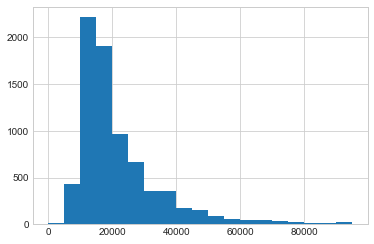

In [29]:
plt.hist(data['cena'], np.arange(100000, step = 5000))
plt.show()

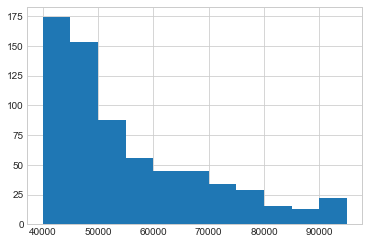

In [30]:
plt.hist(data['cena'], np.arange(40000,100000, step = 5000))
plt.show()

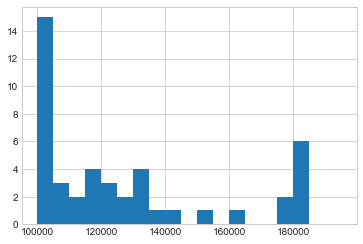

In [31]:
plt.hist(data['cena'], np.arange(100000,200000, step = 5000))
plt.show()

## III. Main indicators of price (number of rooms, area size, condition of object)

First of all, we focus at the most usual drivers of rents' prices and analyse their relationships. 

#regrese (covariances), point plot 
#title ma pocet mistnosti
#lisi se podlahova a uzita plocha
#condition

## IV. Price and adress

In [48]:
#různé části prahy - histogram
#regrese, point plot 
#cena - to budu muset nějak vyfiltrovat z toho dlouhého popisku

## V. Energy demans and adress

In [49]:
#regrese, point plot (jsou lokace se energetickou narocnosti shlukovane?)

## VI. Price and metro

In [ ]:
#regrese, point plot 
#vlak bude fungovat podobně (přidat srovnání, jak by to vyšlo, kdybychom uvažovali 'Metro' OR 'Vlak')

## VII. Metro localization

#dokazeme urcit pozici metra pouze s techto dat pomoci kruznic a pruseciku
#How can we get a Prague map in geopandas
#Understand wheater we can plot address with geopandas (if not, we have to use google maps api to convert address to coordinates)

## Some remarks at the end 

- Zmínit koronavirus a to jak ovlivňuje ceny nemovitostí (takže normálně by ceny bytů v centru byly dražší - pro srovnání můžeme jen jednoduše nakopírovat pár historických cen). => ubjektivní pohled potvrzují i data Bezrealitky.cz, které od poloviny března zaznamenaly výrazně vyšší nárůst u pražských bytů zařazovaných do nabídky. Zatímco v hlavním městě jich bylo aktivovaných v nabídce 1 544, během března (k 27. 3.) již 2 183. To je nárůst o 41 procent.